# Unsupervised Learning Exercise Solution

In [3]:
import warnings
warnings.filterwarnings('ignore')

myfile=r'C:\Users\Hanfi\Documents\Python\Data Sets\winequality-red.csv'

import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

wine=pd.read_csv(myfile,sep=";")

# Q.1

In [4]:
wine=wine[["sulphates","alcohol","pH"]]

wine_std=pd.DataFrame(scale(wine),columns=list(wine.columns))

In [5]:
Ks=np.linspace(2,15,14)

for inertia: 3566.2701117029787 and silhouette score: 0.2880239986038677 number of clusters are: 2
for inertia: 2691.697872396303 and silhouette score: 0.3196127171089919 number of clusters are: 3
for inertia: 2205.863361440713 and silhouette score: 0.28824064419543194 number of clusters are: 4
for inertia: 1867.2305684196904 and silhouette score: 0.27081664963316815 number of clusters are: 5
for inertia: 1660.9058937008608 and silhouette score: 0.27172282877139337 number of clusters are: 6
for inertia: 1499.8154905471524 and silhouette score: 0.24728991657840002 number of clusters are: 7
for inertia: 1369.3458786866372 and silhouette score: 0.25556609113651224 number of clusters are: 8
for inertia: 1262.8168615044242 and silhouette score: 0.2578330868509169 number of clusters are: 9
for inertia: 1168.1479504620327 and silhouette score: 0.25679126387753626 number of clusters are: 10
for inertia: 1081.0259745469502 and silhouette score: 0.2653849136527816 number of clusters are: 11
for 

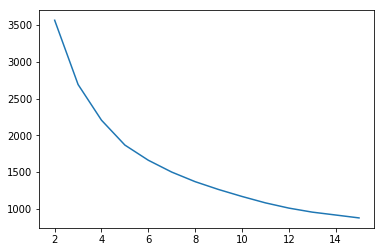

In [6]:
ssw=[]
for k in Ks:
    kmeans=KMeans(n_clusters=int(k))
    kmeans.fit(wine_std)
    sil_score=silhouette_score(wine_std,kmeans.labels_)
    print("for inertia:" ,kmeans.inertia_ ,"and silhouette score:",sil_score,"number of clusters are:", int(k))
    ssw.append(kmeans.inertia_)
plt.plot(Ks,ssw)

In [7]:
# Here selected number of cluster = 6
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(wine_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
labels = kmeans.labels_
wine_std["cluster"]=labels

In [9]:
from ggplot import *

ModuleNotFoundError: No module named 'ggplot'

In [10]:
ggplot(wine_std,aes(x='sulphates',y='alcohol'))+geom_point(aes(color='cluster'),size=50)

NameError: name 'ggplot' is not defined

In [ ]:
ggplot(wine_std,aes(x='sulphates',y='pH'))+geom_point(aes(color='cluster'),size=50)

In [ ]:
ggplot(wine_std,aes(x='alcohol',y='pH'))+geom_point(aes(color='cluster'),size=50)

The overlap we see here is not actually an overlap but its a 6 dimensional view in a 2D space. Meaning there are 6 clusters formed in 6D space and when you see them in 2D space its seems to be overlapped but in reality they never overlap.

# Q.2

dbscan doesnt have a good measure and all the internal measures are either suited to k-means or they need labeled data . 
You need to take a subjective decision whther cluster given by dbscan make business sense or not . When you have labeled data however , dbscan can be used to make distance based similarity features and see whether labelling is consistent with the data or not.

# Q.3

In [ ]:
myfile='~/Dropbox/March onwards/Python Data Science/Data/Wholesale customers data.csv'

groc=pd.read_csv(myfile)

groc=groc[["Milk","Grocery"]]

groc_std=pd.DataFrame(scale(groc),columns=list(groc.columns))

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
r=np.linspace(0.5,5)
for epsilon in r:
    db = DBSCAN(eps=epsilon, min_samples=20, metric='euclidean').fit(groc_std)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clust=len(set(labels))-1
    outlier=np.round(np.count_nonzero(labels == -1)/len(labels)*100,2)
        
    print('Estimated number of clusters: %d', n_clust)
    print("For epsilon =", epsilon ,", percentage of outliers is: ",outlier)
   


Choose the epsilon value that gives at aleast 5% customers which are very different in terms of purchase patterns.

In [ ]:
db = DBSCAN(eps=0.77, min_samples=10, metric='euclidean').fit(groc_std)
groc_std['cluster']=[str(x) for x in db.labels_]

In [ ]:
ggplot(groc_std,aes(x='Milk',y='Grocery',color='cluster'))+geom_point()

# Q.4

In [ ]:
from sklearn.decomposition import FactorAnalysis

In [ ]:
data_file='~/Dropbox/March onwards/Python Data Science/Data/cars.csv'
cars=pd.read_csv(data_file)

In [ ]:
X_cars=cars.drop(['Name'],1)

In [ ]:
X_cars=pd.DataFrame(scale(X_cars),columns=X_cars.columns)

In [ ]:
fa=FactorAnalysis(n_components=4,max_iter=1000)

In [ ]:
fa.fit(X_cars)

In [ ]:
nvar=fa.noise_variance_
plt.plot(nvar)

In [ ]:
print(*zip(X_cars.columns,nvar))

# a.

We will remove the variables one by one for which noice variance is higher than 0.1

In [ ]:
X_cars=X_cars.drop(['Width'],1)

fa=FactorAnalysis(n_components=4,max_iter=1000)

fit=fa.fit(X_cars)
nvar=fa.noise_variance_
print(*zip(X_cars.columns,nvar))
plt.plot(nvar)

In [ ]:
X_cars=X_cars.drop(['Length'],1)

fa=FactorAnalysis(n_components=4,max_iter=1000)

fit=fa.fit(X_cars)
nvar=fa.noise_variance_
print(*zip(X_cars.columns,nvar))
plt.plot(nvar)

In [ ]:
X_cars=X_cars.drop(['Wheelbase'],1)

fa=FactorAnalysis(n_components=4,max_iter=1000)

fit=fa.fit(X_cars)
nvar=fa.noise_variance_
print(*zip(X_cars.columns,nvar))
plt.plot(nvar)

In [ ]:
X_cars=X_cars.drop(['Horsepower'],1)

fa=FactorAnalysis(n_components=4,max_iter=1000)

fit=fa.fit(X_cars)
nvar=fa.noise_variance_
print(*zip(X_cars.columns,nvar))
plt.plot(nvar)

In [ ]:
loadings=fa.components_
loadings

# b.

In [ ]:
print(*zip(X_cars.columns,loadings[0,]))

Loadings for price variables [Retail & Dealer ] is pretty higher , they are the domninant contributors to these factors. Rest of the variables except mileage ones also contribute positively to this. We can consider this factor to be vehicle's percieved value. Higher mileage indicates towards not so high value vehicle accroding to this value indicator

In [ ]:
print(*zip(X_cars.columns,loadings[1,]))

Here we can see that more weightage is given to Weight,Engine and Cylinders and the relation is inverse in nature
which tells all these variables tends to lower the mileage of the car. We can label this factor as fuel efficiency

In [ ]:
print(*zip(X_cars.columns,loadings[2,]))

Here we can see that all variables are given the positive weights so we can label this factor as specs.

In [ ]:
print(*zip(X_cars.columns,loadings[3,]))

Here we can see that more weightage is given CityMPG, Weight and Cylinder. We can label this factor as torque, which is decreases with increase in Cylinders, and increases with increase in mileage and weight.